# Digital Image Processing Menu Based System

This project is an interactive **Digital Image Processing tool**

It allows users to **enter the path of an image** and apply various **image processing operations** including:  

- Negative Image  
- Thresholding  
- Logarithmic Transformation  
- Power Law (Gamma) Transformation  
- Histogram Stretching, Shrinking, Sliding  
- Histogram Equalization  
- Pixel based, Region based, and Edge based Segmentation  
- Edge Detection Filters: Prewitt, Roberts, Sobel  

### 1. Importing Libraries:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 2. Defining Image Processing Functions:

In [2]:
def negative_image(img):
    return 255 - img

def thresholding(img, threshold=128):
    _, thresh_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return thresh_img

def logarithmic_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * (np.log(img + 1))
    return np.array(log_img, dtype=np.uint8)

def power_law_transformation(img, gamma=1.0):
    gamma_corrected = np.array(255 * (img / 255) ** gamma, dtype='uint8')
    return gamma_corrected

def histogram_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.array(stretched, dtype=np.uint8)

def histogram_shrinking(img):
    a = 50
    b = 200
    shrunken = np.clip((img - np.min(img)) * (b - a) / (np.max(img) - np.min(img)) + a, 0, 255)
    return np.array(shrunken, dtype=np.uint8)

def histogram_sliding(img, shift_value=50):
    slided = np.clip(img + shift_value, 0, 255)
    return slided

def histogram_equalization(img):
    if len(img.shape) == 2:  # grayscale image
        return cv2.equalizeHist(img)
    else:  # color image
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def pixel_based_segmentation(img, threshold=128):
    return thresholding(img, threshold)

def region_based_segmentation(img):
    # Simple example using flood fill
    h, w = img.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    flood_img = img.copy()
    cv2.floodFill(flood_img, mask, (0, 0), 255)
    return flood_img

def edge_based_segmentation(img):
    edges = cv2.Canny(img, 100, 200)
    return edges

def apply_prewitt_filter(img):
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    x = cv2.filter2D(img, cv2.CV_16S, kernelx)
    y = cv2.filter2D(img, cv2.CV_16S, kernely)
    abs_x = cv2.convertScaleAbs(x)
    abs_y = cv2.convertScaleAbs(y)
    prewitt = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
    return prewitt

def apply_roberts_filter(img):
    kernelx = np.array([[1, 0], [0, -1]], dtype=int)
    kernely = np.array([[0, 1], [-1, 0]], dtype=int)
    x = cv2.filter2D(img, cv2.CV_16S, kernelx)
    y = cv2.filter2D(img, cv2.CV_16S, kernely)
    abs_x = cv2.convertScaleAbs(x)
    abs_y = cv2.convertScaleAbs(y)
    roberts = cv2.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
    return roberts

def apply_sobel_filter(img):
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    abs_sobelx = cv2.convertScaleAbs(sobelx)
    abs_sobely = cv2.convertScaleAbs(sobely)
    sobel = cv2.addWeighted(abs_sobelx, 0.5, abs_sobely, 0.5, 0)
    return sobel

def display_images(original, result):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title('Result Image')
    plt.show()


Choose an operation:
1. Negative Image
2. Thresholding
3. Logarithmic Transformation
4. Power Law Transformation
5. Histogram Stretching
6. Histogram Shrinking
7. Histogram Sliding
8. Histogram Equalization
9. Pixel-based Segmentation
10. Region-based Segmentation
11. Edge-based Segmentation
12. Prewitt Filter
13. Robert’s Filter
14. Sobel Filter


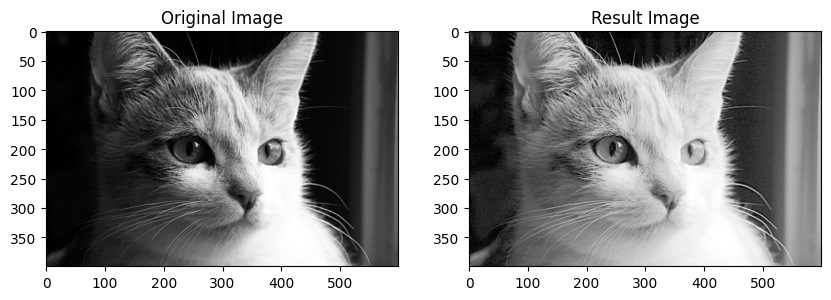

Thank you!


In [4]:
def main():
    image_path = input("Enter the path to the image: ")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Unable to load image.")
        return

    while True:
        print("Choose an operation:")
        print("1. Negative Image")
        print("2. Thresholding")
        print("3. Logarithmic Transformation")
        print("4. Power Law Transformation")
        print("5. Histogram Stretching")
        print("6. Histogram Shrinking")
        print("7. Histogram Sliding")
        print("8. Histogram Equalization")
        print("9. Pixel-based Segmentation")
        print("10. Region-based Segmentation")
        print("11. Edge-based Segmentation")
        print("12. Prewitt Filter")
        print("13. Robert’s Filter")
        print("14. Sobel Filter")

        choice = int(input("Enter your choice: "))

        if choice == 1:
            result = negative_image(img)
        elif choice == 2:
            result = thresholding(img)
        elif choice == 3:
            result = logarithmic_transformation(img)
        elif choice == 4:
            gamma = float(input("Enter gamma value for power law transformation: "))
            result = power_law_transformation(img, gamma)
        elif choice == 5:
            result = histogram_stretching(img)
        elif choice == 6:
            result = histogram_shrinking(img)
        elif choice == 7:
            shift_value = int(input("Enter shift value for histogram sliding: "))
            result = histogram_sliding(img, shift_value)
        elif choice == 8:
            result = histogram_equalization(img)
        elif choice == 9:
            threshold = int(input("Enter threshold value for pixel-based segmentation: "))
            result = pixel_based_segmentation(img, threshold)
        elif choice == 10:
            result = region_based_segmentation(img)
        elif choice == 11:
            result = edge_based_segmentation(img)
        elif choice == 12:
            result = apply_prewitt_filter(img)
        elif choice == 13:
            result = apply_roberts_filter(img)
        elif choice == 14:
            result = apply_sobel_filter(img)
        else:
            print("Invalid choice.")
            continue

        display_images(img, result)

        another = input("Do you want to apply another filter on the original image? (yes/no): ")
        if another.lower() != 'yes':
            print("Thank you!")
            break

if __name__ == "__main__":
    main()
